In [1]:
%matplotlib inline
import quantstats as qs
import pandas as pd
import numpy as np

In [2]:
# leer archivo de excel 

roboforex_history = pd.read_excel('ReportHistory-2112117.xlsx')
#roboforex_history =roboforex_history.replace(0.00,np.nan).dropna(axis=1,how="all")
roboforex_history.head()

,Time,Deal,Symbol,Type,Direction,Volume,Price,Order,Profit,Balance
0,2022.07.12,9507396,AUDUSD,buy,in,0.09,0.67352,16879990,0.00,40537.84
1,2022.07.12,9508861,USDJPY,sell,in,0.12,137.27400,16879987,0.00,40537.84
2,2022.07.12,9510218,USDJPY,buy,out,0.12,137.49100,16882672,-18.94,40518.42
3,2022.07.12,9513474,AUDUSD,sell,out,0.09,0.67126,16885870,-20.34,40497.72
4,2022.07.12,9517173,USDJPY,buy,in,0.08,136.98700,16879980,0.00,40497.72


In [3]:
# crear columna con nombre de "pct" y aplicarle un calculo de cambio porcentual a la columna de balance 

roboforex_history['pct'] = roboforex_history['Balance'].pct_change()
roboforex_history.head()

,Time,Deal,Symbol,Type,Direction,Volume,Price,Order,Profit,Balance,pct
0,2022.07.12,9507396,AUDUSD,buy,in,0.09,0.67352,16879990,0.00,40537.84,NaN
1,2022.07.12,9508861,USDJPY,sell,in,0.12,137.27400,16879987,0.00,40537.84,0.000000
2,2022.07.12,9510218,USDJPY,buy,out,0.12,137.49100,16882672,-18.94,40518.42,-0.000479
3,2022.07.12,9513474,AUDUSD,sell,out,0.09,0.67126,16885870,-20.34,40497.72,-0.000511
4,2022.07.12,9517173,USDJPY,buy,in,0.08,136.98700,16879980,0.00,40497.72,0.000000


In [4]:
# to datetime a la columna "Time"

roboforex_history['Time'] = pd.to_datetime(roboforex_history['Time'])


In [5]:
# seteo la columna "Time" como indice

roboforex_history = roboforex_history.set_index('Time')

                           Strategy
-------------------------  ----------
Start Period               2022-07-12
End Period                 2022-08-09
Risk-Free Rate             0.0%
Time in Market             44.0%

Cumulative Return          -0.1%
CAGR﹪                     -1.34%

Sharpe                     -0.88
Prob. Sharpe Ratio         37.38%
Smart Sharpe               -0.86
Sortino                    -1.74
Smart Sortino              -1.7
Sortino/√2                 -1.23
Smart Sortino/√2           -1.2
Omega                      0.78

Max Drawdown               -0.23%
Longest DD Days            28
Volatility (ann.)          0.72%
Calmar                     -5.74
Skew                       3.19
Kurtosis                   14.47

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.1%
Kelly Criterion            -6.19%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.08%
Expected Shortfall (cVaR)  -0.08%

Max Consecutive Wins   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-07-12,2022-07-26,2022-08-09,28,-0.233066,-0.189551


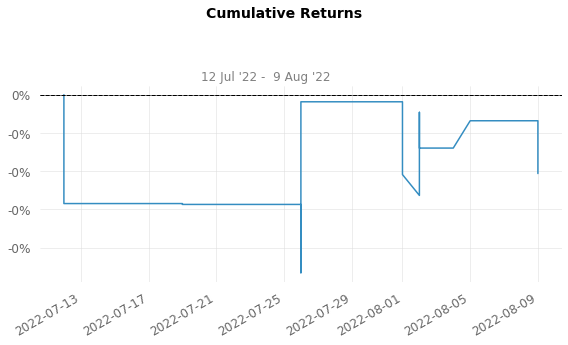

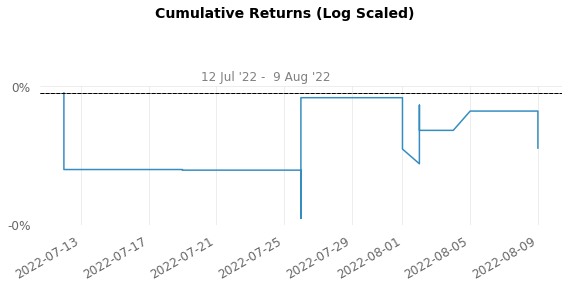

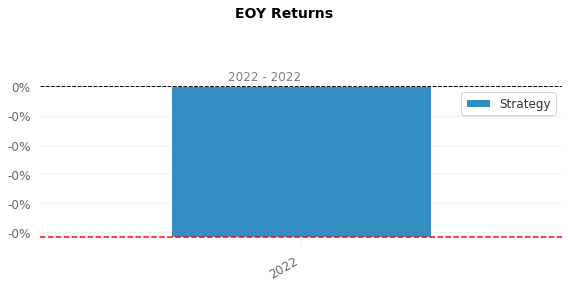

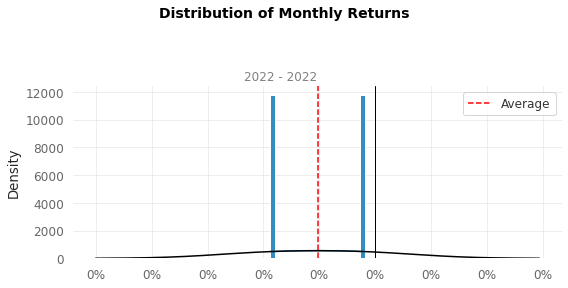

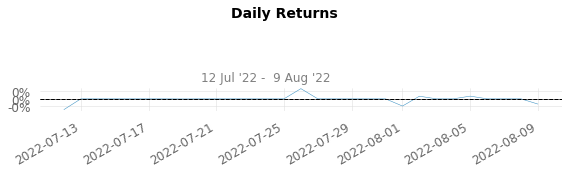

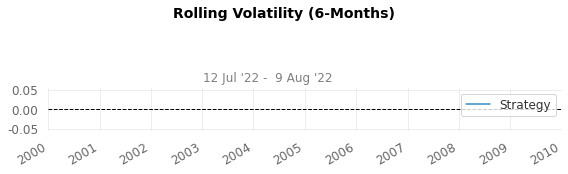

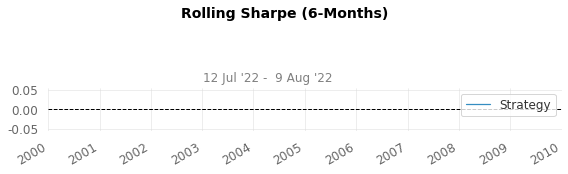

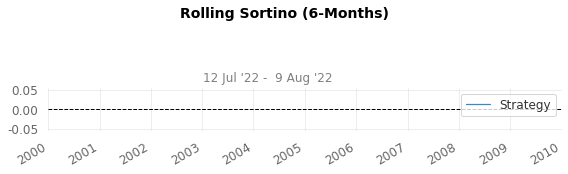

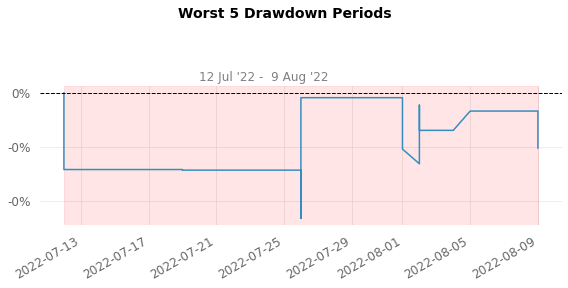

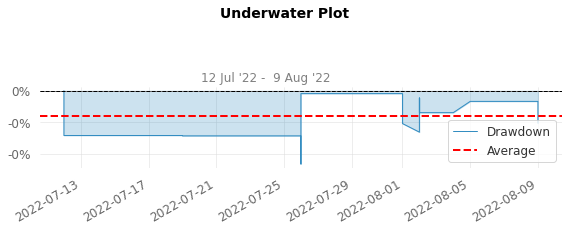

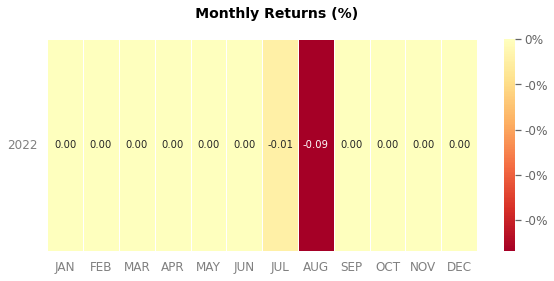

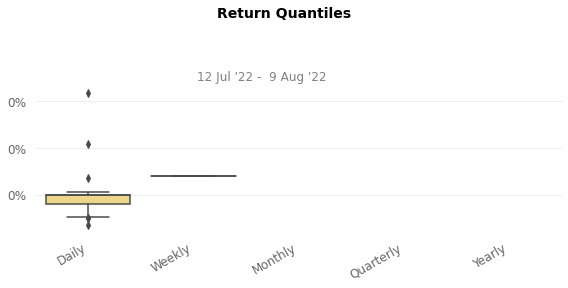

In [14]:
# aplico calculos de quantstats a la columna "pct"

qs.reports.full((roboforex_history['pct']))